In [1]:
import os 
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv('fire_var.env'))

True

In [3]:
# connect to postgres

try:
    conn = psycopg2.connect(database=os.environ.get("erdatabase"), user=os.environ.get("eruser"), 
                            password = os.environ.get("erpassword"), 
                            host=os.environ.get("erhost"), 
                            port=os.environ.get('port'))
    
except psycopg2.Error as e:
    print("I am unable to connect to the database")
    print(e)
    print(e.pgcode)
    print(e.pgerror)
    print(traceback.format_exc())

In [4]:
def pquery(QUERY):
    '''
    takes SQL query string, opens a cursor, and executes query in psql
    '''
    
    cur = conn.cursor()
    
    try:
        print("SQL QUERY = "+QUERY)
        cur.execute("SET statement_timeout = 0")
        cur.execute(QUERY)
        # Extract the column names and insert them in header
        col_names = []
        for elt in cur.description:
            col_names.append(elt[0])    
    
        D = cur.fetchall() #convert query result to list
        #pprint(D)
        #conn.close()
        # Create the dataframe, passing in the list of col_names extracted from the description
        return pd.DataFrame(D, columns=col_names)

    except Exception as e:
        print(e.pgerror)



In [8]:
QUERY1= '''
SELECT incident_id,
 EXTRACT(DAY FROM realtime) AS day,
 EXTRACT(HOUR FROM realtime) AS hour,
 EXTRACT(WEEK FROM realtime) AS week,
 EXTRACT(MONTH FROM realtime) AS month,
 EXTRACT(YEAR FROM realtime) AS year
FROM (select incident_id,min(realtime) as realtime  from inctimes 
where responder_id is not null 
and timedesc_id = 3 group by incident_id) as dispatch_time'''

In [9]:
df1 = pquery(QUERY1)

SQL QUERY = 
SELECT incident_id,
 EXTRACT(DAY FROM realtime) AS day,
 EXTRACT(HOUR FROM realtime) AS hour,
 EXTRACT(WEEK FROM realtime) AS week,
 EXTRACT(MONTH FROM realtime) AS month,
 EXTRACT(YEAR FROM realtime) AS year
FROM (select incident_id,min(realtime) as realtime  from inctimes 
where responder_id is not null 
and timedesc_id = 3 group by incident_id) as dispatch_time


In [11]:
df1.head(15)

,incident_id,day,hour,week,month,year
0,809019,24.0,2.0,42.0,10.0,2010.0
1,910309,21.0,15.0,12.0,3.0,2012.0
2,1009634,16.0,3.0,29.0,7.0,2013.0
3,870730,1.0,21.0,35.0,9.0,2011.0
4,923122,24.0,10.0,21.0,5.0,2012.0
5,1283207,26.0,16.0,43.0,10.0,2016.0
6,1169817,14.0,17.0,29.0,7.0,2015.0
7,1191406,10.0,8.0,41.0,10.0,2015.0
8,1175145,4.0,16.0,32.0,8.0,2015.0
9,761426,12.0,0.0,6.0,2.0,2010.0


In [16]:
# Check whether there is duplication
df1_ = df1.copy()
print (len(df1_))
df1_.set_index('incident_id').index.get_duplicates()

545037


[]

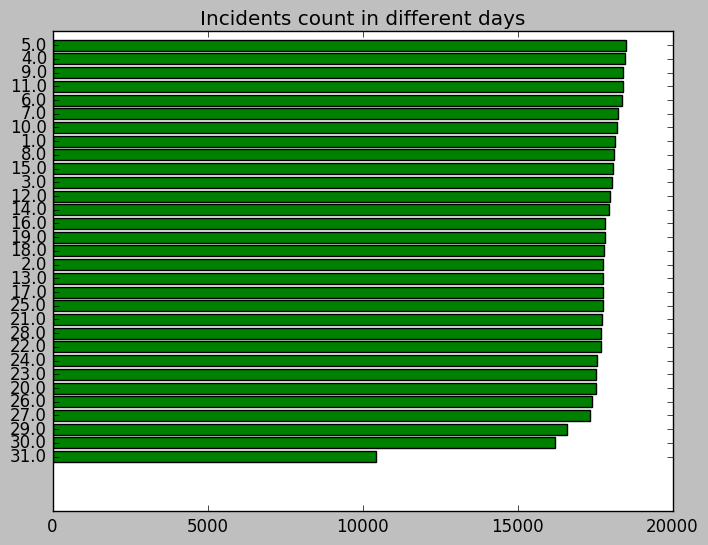

In [36]:
dayrank = df1.groupby(['day']).size().to_frame('size')
dayrank.sort_values('size', ascending=False, inplace=True)
dayrank
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(1,len(dayrank)+1)

ax.barh(y_pos, dayrank['size'], align='center',
        color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(dayrank.index.values)

ax.set_title('Incidents count in different days')

plt.show()

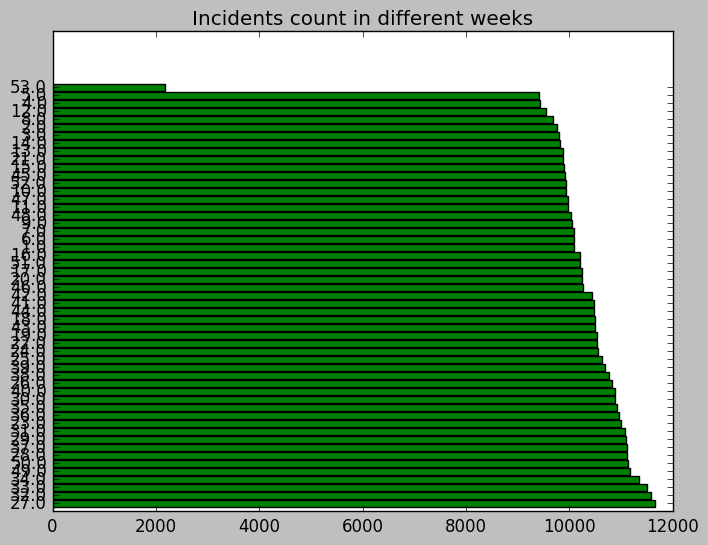

In [40]:
weekrank = df1.groupby(['week']).size().to_frame('size')
weekrank.sort_values('size', ascending=False, inplace=True)
weekrank
fig2, ax2 = plt.subplots()

# Example data
y_pos2 = np.arange(1,len(weekrank)+1)

ax2.barh(y_pos2, weekrank['size'], align='center',
        color='green')
ax2.set_yticks(y_pos2)
ax2.set_yticklabels(weekrank.index.values)

#ax.set_xlabel('Performance')
ax2.set_title('Incidents count in different weeks')

plt.show()


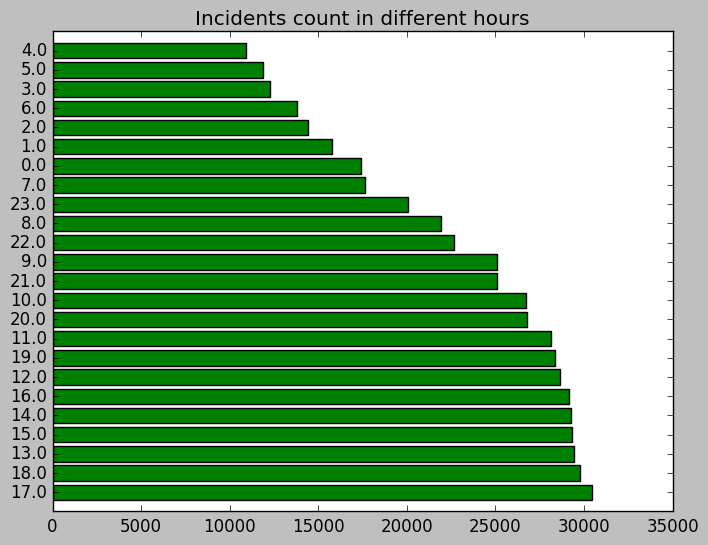

In [43]:
hourrank = df1.groupby(['hour']).size().to_frame('size')
hourrank.sort_values('size', ascending=False, inplace=True)
hourrank
fig3, ax3 = plt.subplots()

# Example data
y_pos3 = np.arange(1,len(hourrank)+1)

ax3.barh(y_pos3, hourrank['size'], align='center',
        color='green')
ax3.set_yticks(y_pos3)
ax3.set_yticklabels(hourrank.index.values)

#ax.set_xlabel('Performance')
ax3.set_title('Incidents count in different hours')

plt.show()

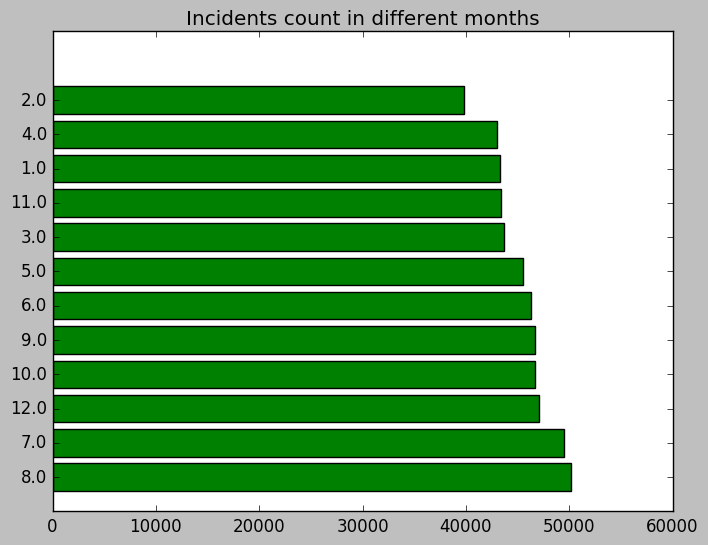

In [46]:
monthrank = df1.groupby(['month']).size().to_frame('size')
monthrank.sort_values('size', ascending=False, inplace=True)
monthrank
fig4, ax4 = plt.subplots()

# Example data
y_pos4 = np.arange(1,len(monthrank)+1)

ax4.barh(y_pos4, monthrank['size'], align='center',
        color='green')
ax4.set_yticks(y_pos4)
ax4.set_yticklabels(monthrank.index.values)

#ax.set_xlabel('Performance')
ax4.set_title('Incidents count in different months')

plt.show()
